
Credit Scoring Project
Name: Sammarieo Brown
Data & Machine Learning Engineer


# Package Management

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

warnings.filterwarnings('ignore')

# Data Preprocessing

## Load Data

## Data Description
| Variable Name                        | Description                                                                                                                                              | Type       |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| SeriousDlqin2yrs                     | Person experienced 90 days past due delinquency or worse                                                                                                 | Y/N        |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | Percentage |
| age                                  | Age of borrower in years                                                                                                                                 | Integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years.                                                                  | Integer    |
| DebtRatio                            | Monthly debt payments, alimony, living costs divided by monthly gross income                                                                             | Percentage |
| MonthlyIncome                        | Monthly income                                                                                                                                           | Real       |
| NumberOfOpenCreditLinesAndLoans      | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)                                                     | Integer    |
| NumberOfTimes90DaysLate              | Number of times borrower has been 90 days or more past due                                                                                               | Integer    |
| NumberRealEstateLoansOrLines         | Number of mortgage and real estate loans including home equity lines of credit                                                                           | Integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years.                                                                  | Integer    |
| NumberOfDependents                   | Number of dependents in family excluding themselves (spouse, children etc.)                                                                              | Integer    |



In [358]:
training_file_path = r"C:\Users\samma\PycharmProjects\jn_ta\data\train\cs-training.xlsx"
sheet_name = "cs-training"
training_data = pd.read_excel(training_file_path, sheet_name=sheet_name)

In [359]:
training_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Data Exploration

### Data Types

In [360]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Check for Missing Values

In [361]:
# check for missing values
print(training_data.isnull().sum())

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [362]:
def check_missing_values(df):
    missing_found = False
    for column in df.columns:
        if df[column].isnull().any():
            missing_percentage = (df[column].isnull().sum() / len(df[column])) * 100
            print("Percentage of missing values in the {} column: {:.2f}%".format(column, missing_percentage))
            missing_found = True
    if not missing_found:
        print("No missing values found")


check_missing_values(training_data)


Percentage of missing values in the MonthlyIncome column: 19.82%
Percentage of missing values in the NumberOfDependents column: 2.62%


### Check for Skewness

In [363]:
# check for skewness
print(training_data.skew())

Unnamed: 0                                0.000000
SeriousDlqin2yrs                          3.468857
RevolvingUtilizationOfUnsecuredLines     97.631574
age                                       0.188995
NumberOfTime30-59DaysPastDueNotWorse     22.597108
DebtRatio                                95.157793
MonthlyIncome                           114.040318
NumberOfOpenCreditLinesAndLoans           1.215314
NumberOfTimes90DaysLate                  23.087345
NumberRealEstateLoansOrLines              3.482484
NumberOfTime60-89DaysPastDueNotWorse     23.331743
NumberOfDependents                        1.588242
dtype: float64


In [364]:
def analyze_skewness(df):
    # Exclude categorical columns
    num_df = df.select_dtypes(include=[np.number])

    skew_values = num_df.skew()

    analysis = []
    for column, skewness in skew_values.items():
        if abs(skewness) < 0.5:
            skew_type = 'approximately symmetric'
        elif skewness > 0:
            skew_type = 'right-skewed (positive skewness)'
        else:
            skew_type = 'left-skewed (negative skewness)'

        if abs(skewness) > 5:
            high_skew = 'Yes'
        else:
            high_skew = 'No'

        analysis.append([column, skewness, skew_type, high_skew])

    result_df = pd.DataFrame(analysis, columns=['Variables', 'Skewness', 'Analysis', 'Highly Skewed'])
    return result_df


skewed_df = analyze_skewness(training_data)

skewed_df[skewed_df['Highly Skewed'] == 'Yes']


,Variables,Skewness,Analysis,Highly Skewed
2,RevolvingUtilizationOfUnsecuredLines,97.631574,right-skewed (positive skewness),Yes
4,NumberOfTime30-59DaysPastDueNotWorse,22.597108,right-skewed (positive skewness),Yes
5,DebtRatio,95.157793,right-skewed (positive skewness),Yes
6,MonthlyIncome,114.040318,right-skewed (positive skewness),Yes
8,NumberOfTimes90DaysLate,23.087345,right-skewed (positive skewness),Yes
10,NumberOfTime60-89DaysPastDueNotWorse,23.331743,right-skewed (positive skewness),Yes


## Data Cleaning
### Handling Missing Values

#### MonthlyIncome

In [365]:
training_data.MonthlyIncome.aggregate(['mean', 'median', 'max', 'min']).apply(lambda x: "${:,.2f}".format(x))

mean          $6,670.22
median        $5,400.00
max       $3,008,750.00
min               $0.00
Name: MonthlyIncome, dtype: object

In [366]:
# fill missing values with the average
training_data.MonthlyIncome.fillna(training_data.MonthlyIncome.mean(), inplace=True)

#### NumberOfDependents

In [367]:
training_data.NumberOfDependents.aggregate(['mean', 'median', 'max', 'min'])

mean       0.757222
median     0.000000
max       20.000000
min        0.000000
Name: NumberOfDependents, dtype: float64

In [368]:
training_data.NumberOfDependents.aggregate(['mode'])

,mode
0,0.0


In [369]:
# fill missing values with the mode
training_data.NumberOfDependents.fillna(training_data.NumberOfDependents.mode()[0], inplace=True)

In [370]:
check_missing_values(training_data)

No missing values found


In [371]:
# handle unwanted columns
training_data.drop(columns=['Unnamed: 0'], inplace=True)

### Handle Duplicate Values

In [372]:
# check for duplicates
training_data.duplicated().sum()

767

In [373]:
# drop duplicates
training_data.drop_duplicates(inplace=True)

In [374]:
training_data.shape

(149233, 11)

# Exploratory Data Analysis

## Descriptive Statistics

In [375]:
training_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149233.000000,149233.000000,149233.000000,149233.000000,149233.000000,1.492330e+05,149233.000000,149233.000000,149233.000000,149233.000000,149233.000000
mean,0.067036,6.077045,52.298145,0.388386,354.808254,6.674148e+03,8.488082,0.232435,1.023473,0.206811,0.741177
std,0.250085,250.396053,14.714050,3.779712,2042.891693,1.291259e+04,5.134233,3.752133,1.130304,3.736132,1.108596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030210,41.000000,0.000000,0.178098,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154285,52.000000,0.000000,0.368578,6.563000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.555959,63.000000,0.000000,0.877090,7.409000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Data Visualization
### Univariate Data Analysis
#### Serious Delinquency in 2 years

In [376]:
# count the frequency of each unique value in SeriousDlqin2yrs
training_data['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139229
1     10004
Name: count, dtype: int64

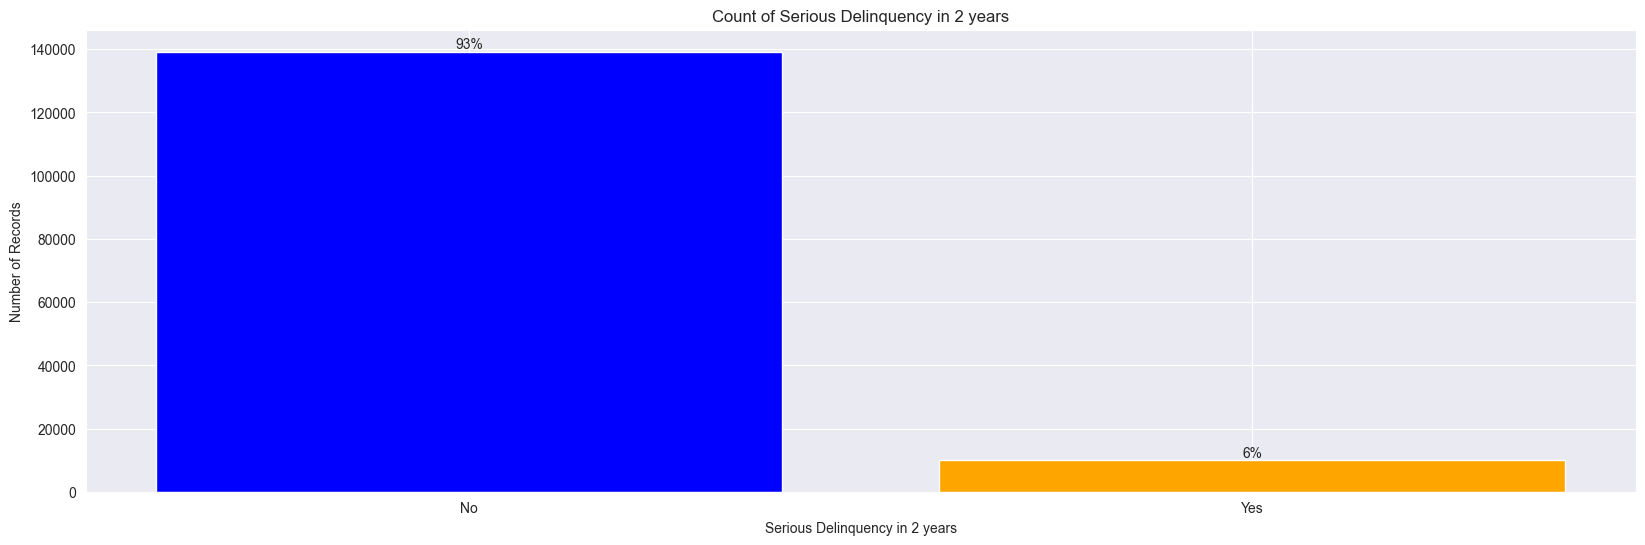

In [454]:
# plot the frequency of each unique value in SeriousDlqin2yrs

# Count the unique values in the 'SeriousDlqin2yrs' column
counts = training_data['SeriousDlqin2yrs'].value_counts()

# Calculate the percentage for each unique value
percentage = counts / training_data['SeriousDlqin2yrs'].count() * 100

# Plot the counts as a bar graph
plt.figure(figsize=(20,6))
bars = plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.xlabel('Serious Delinquency in 2 years')
plt.ylabel('Number of Records')
plt.title('Count of Serious Delinquency in 2 years')
plt.xticks(counts.index, ['No', 'Yes'])

# Add the percentage on top of each bar
for i in range(len(bars)):
    yvalue = bars[i].get_height()
    plt.text(bars[i].get_x() + bars[i].get_width()/2, yvalue, '%d%%' % percentage[i], ha='center', va='bottom')

plt.show()


#### Age Distribution and Boxplot

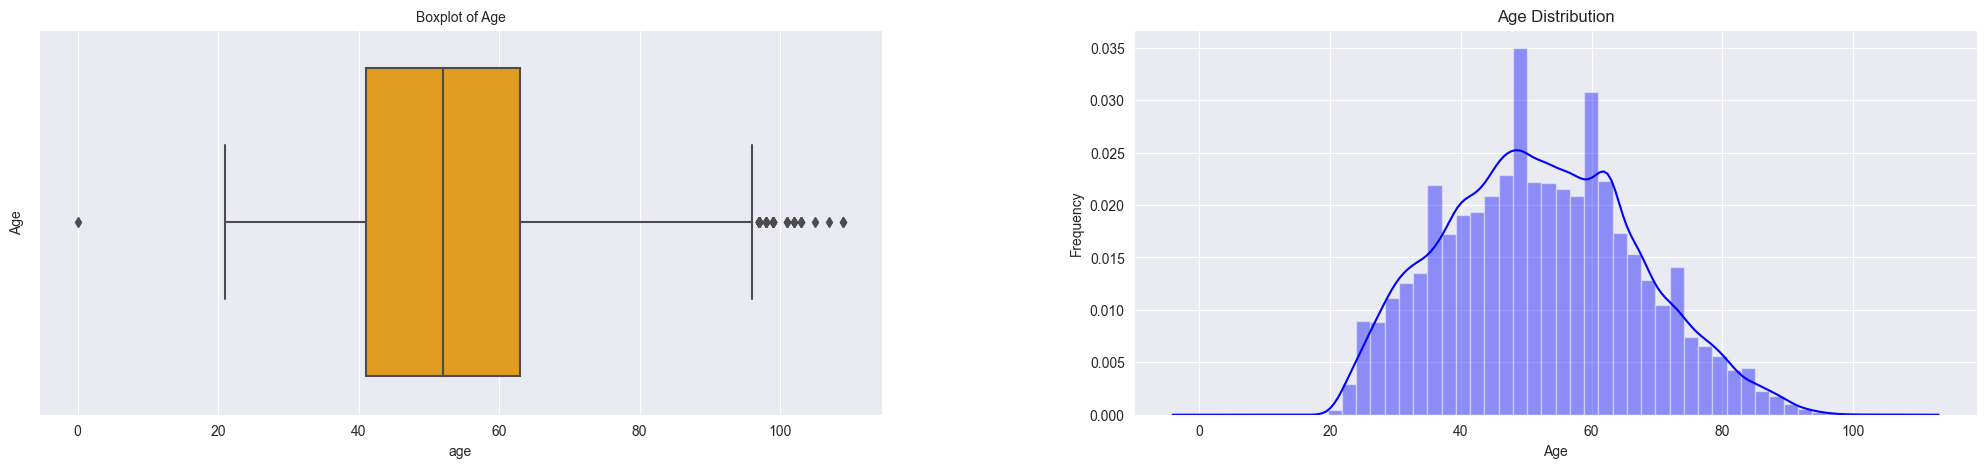

In [436]:

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))

# Boxplot of age
sns.boxplot(x=training_data['age'], orient='h', color='orange', ax=ax1)
ax1.set_ylabel('Age', fontsize=10)
ax1.set_title('Boxplot of Age', fontsize=10)

# Age distribution
sns.distplot(training_data['age'], color='blue', ax=ax2)
ax2.set_title('Age Distribution')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the combined plot
plt.show()


#### Monthly Income Distribution

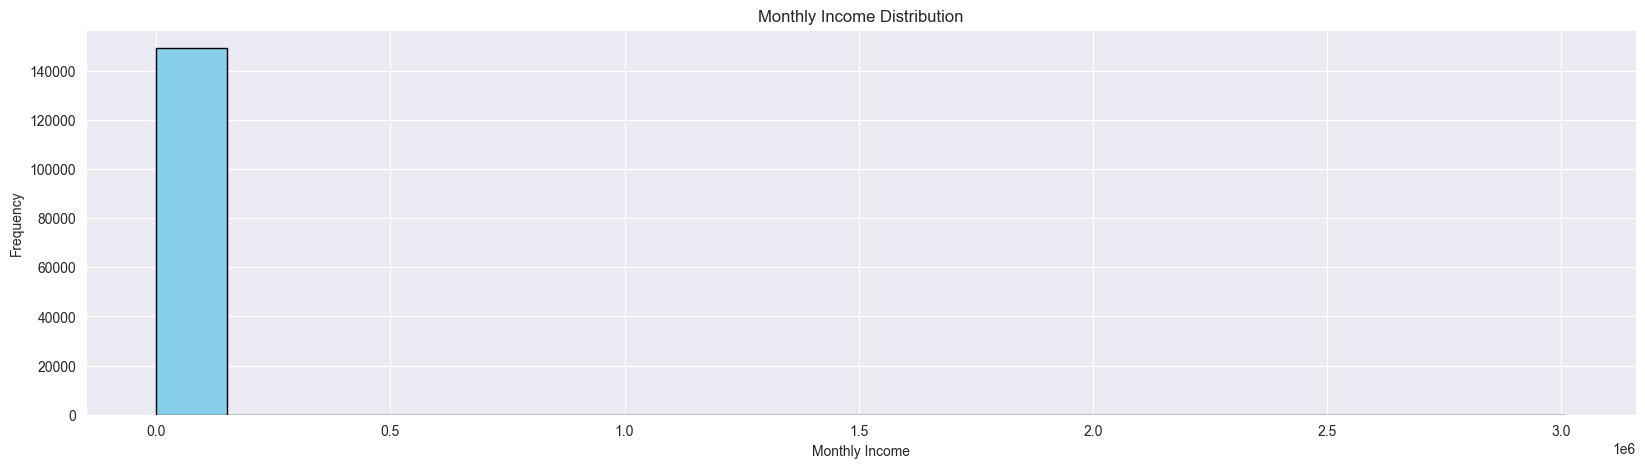

In [437]:
plt.figure(figsize=(20, 5))

# Plot histogram of 'MonthlyIncome'
plt.hist(training_data['MonthlyIncome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()


#### Number Of Open Credit Lines And Loans Distribution

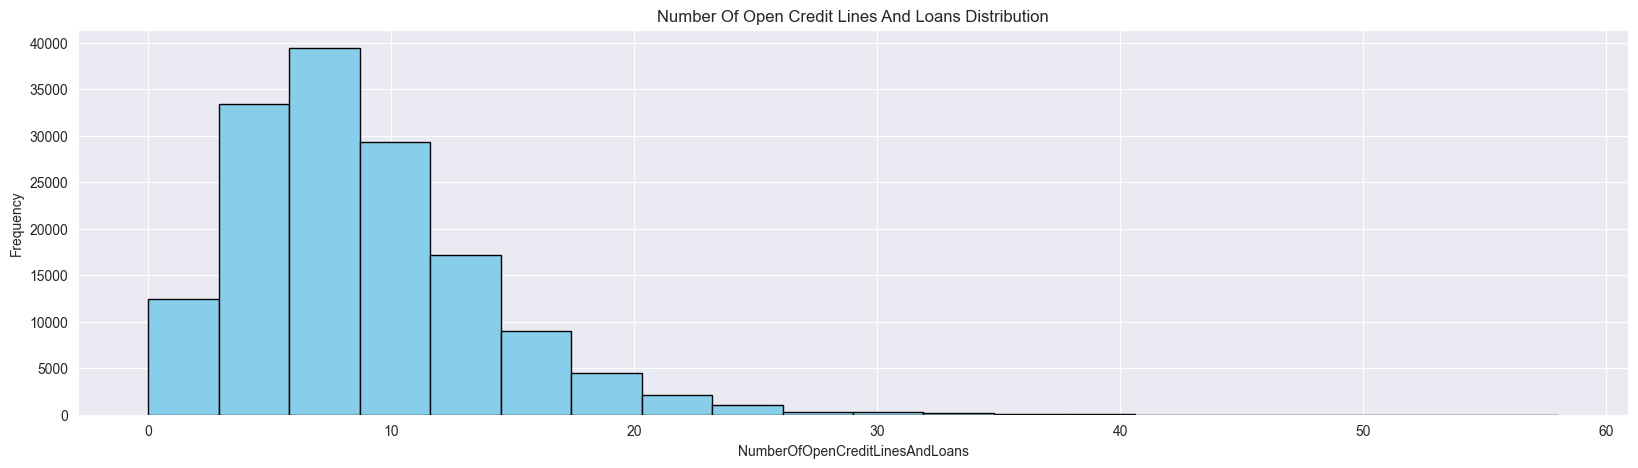

In [438]:
plt.figure(figsize=(20, 5))

# Plot histogram of 'NumberOfOpenCreditLinesAndLoans'
plt.hist(training_data['NumberOfOpenCreditLinesAndLoans'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number Of Open Credit Lines And Loans Distribution')
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('Frequency')

# Show the plot
plt.show()


#### Number Of Real Estate Loans Or Lines Distribution

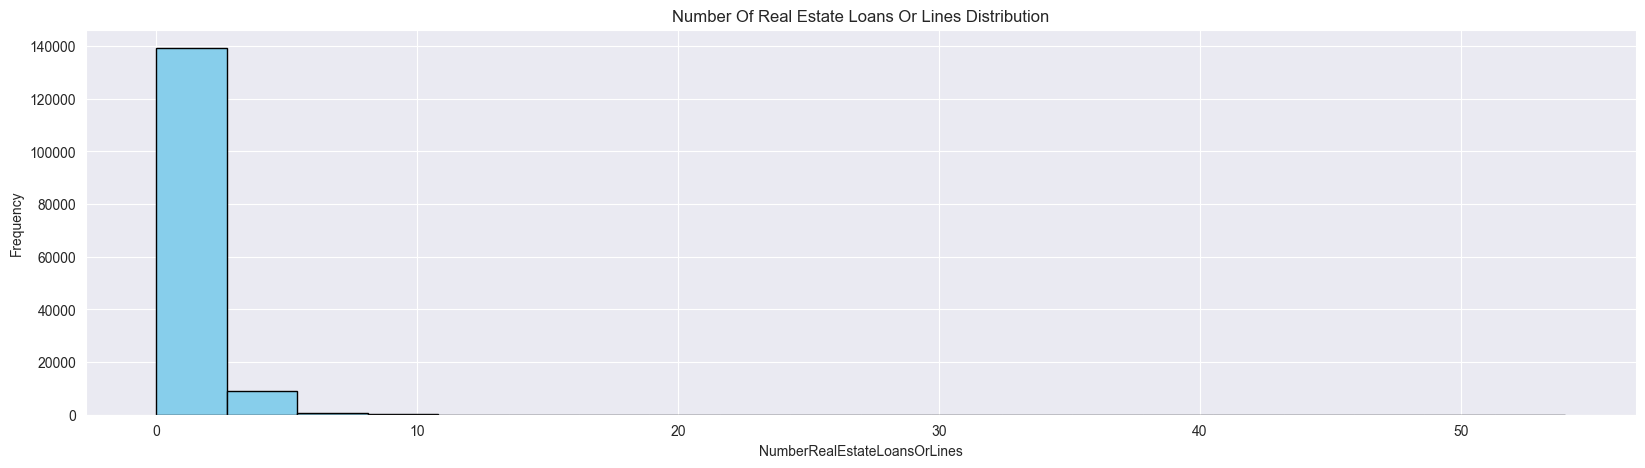

In [439]:

plt.figure(figsize=(20, 5))

# Plot histogram of 'NumberRealEstateLoansOrLines'
plt.hist(training_data['NumberRealEstateLoansOrLines'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number Of Real Estate Loans Or Lines Distribution')
plt.xlabel('NumberRealEstateLoansOrLines')
plt.ylabel('Frequency')

# Show the plot
plt.show()



#### Number Of Dependents Distribution

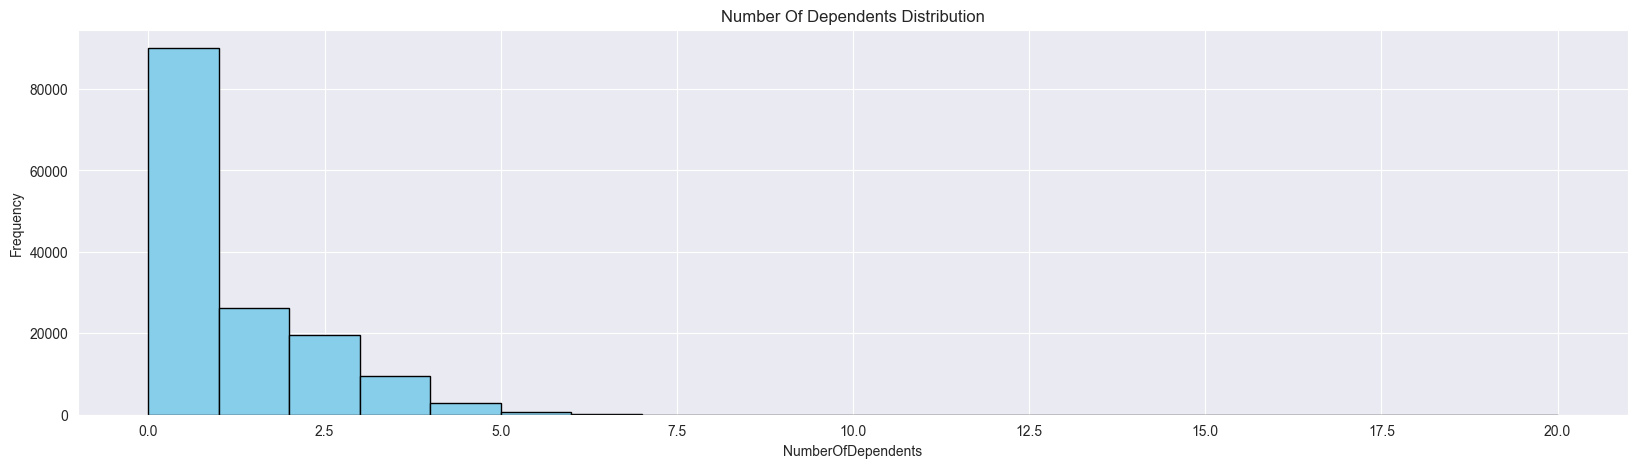

In [440]:
plt.figure(figsize=(20, 5))

# Plot histogram of 'NumberOfDependents'
plt.hist(training_data['NumberOfDependents'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number Of Dependents Distribution')
plt.xlabel('NumberOfDependents')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### Loan Delinquency by Days

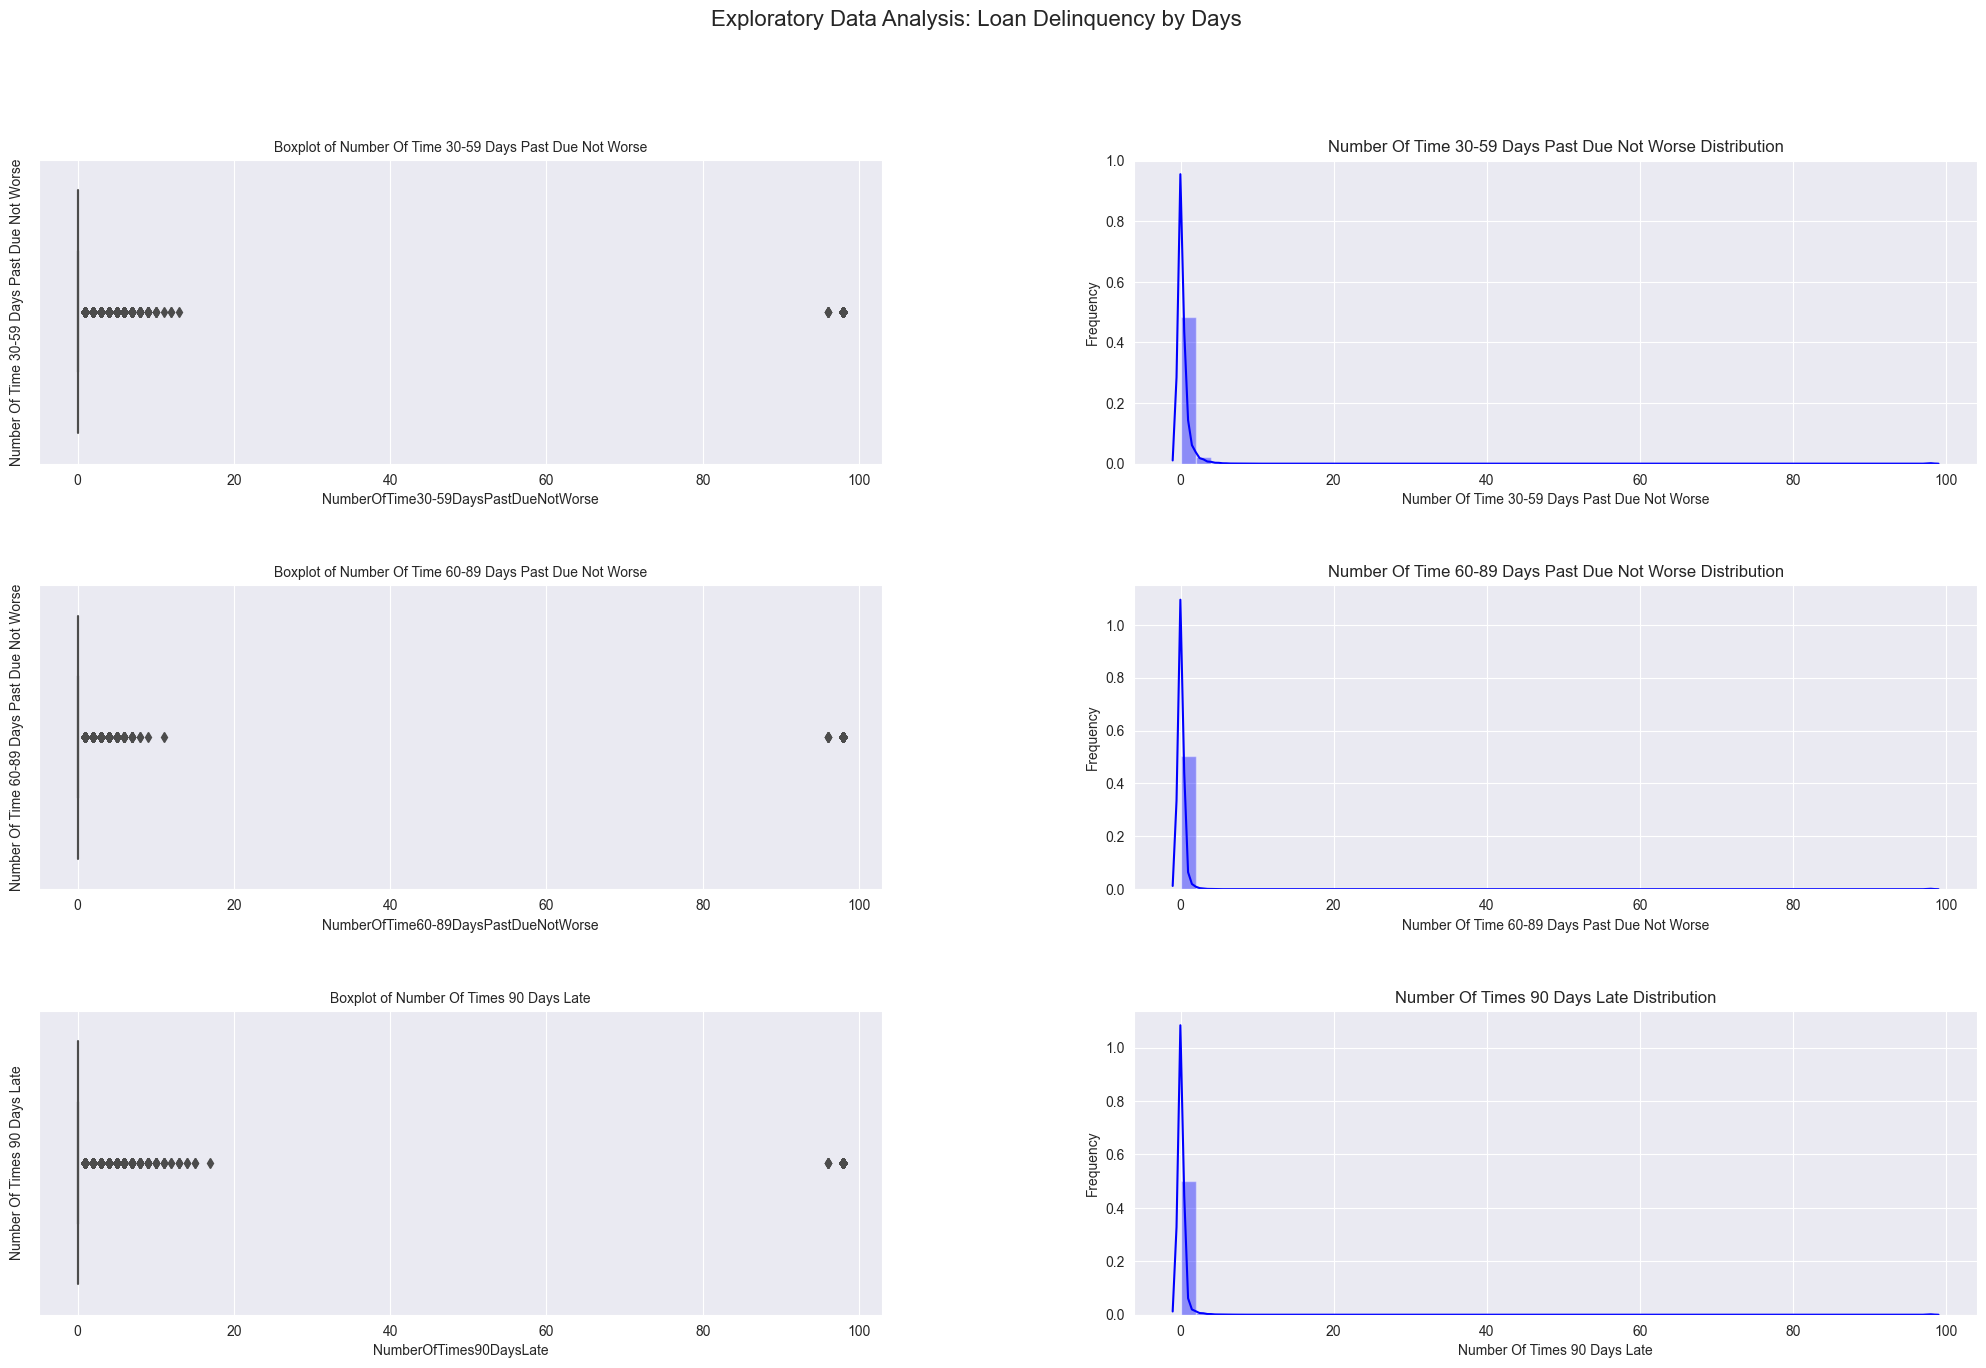

In [441]:


# Set up the figure with three subplots
fig, axes = plt.subplots(3, 2, figsize=(25, 15))

# Set titles for the entire figure
fig.suptitle('Exploratory Data Analysis: Loan Delinquency by Days', fontsize=16)

# Boxplot and distribution for 'NumberOfTime30-59DaysPastDueNotWorse'
sns.boxplot(x=training_data['NumberOfTime30-59DaysPastDueNotWorse'], orient='h', color='orange', ax=axes[0, 0])
axes[0, 0].set_ylabel('Number Of Time 30-59 Days Past Due Not Worse', fontsize=10)
axes[0, 0].set_title('Boxplot of Number Of Time 30-59 Days Past Due Not Worse', fontsize=10)
sns.distplot(training_data['NumberOfTime30-59DaysPastDueNotWorse'], color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Number Of Time 30-59 Days Past Due Not Worse Distribution')
axes[0, 1].set_xlabel('Number Of Time 30-59 Days Past Due Not Worse')
axes[0, 1].set_ylabel('Frequency')

# Boxplot and distribution for 'NumberOfTime60-89DaysPastDueNotWorse'
sns.boxplot(x=training_data['NumberOfTime60-89DaysPastDueNotWorse'], orient='h', color='orange', ax=axes[1, 0])
axes[1, 0].set_ylabel('Number Of Time 60-89 Days Past Due Not Worse', fontsize=10)
axes[1, 0].set_title('Boxplot of Number Of Time 60-89 Days Past Due Not Worse', fontsize=10)
sns.distplot(training_data['NumberOfTime60-89DaysPastDueNotWorse'], color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Number Of Time 60-89 Days Past Due Not Worse Distribution')
axes[1, 1].set_xlabel('Number Of Time 60-89 Days Past Due Not Worse')
axes[1, 1].set_ylabel('Frequency')

# Boxplot and distribution for 'NumberOfTimes90DaysLate'
sns.boxplot(x=training_data['NumberOfTimes90DaysLate'], orient='h', color='orange', ax=axes[2, 0])
axes[2, 0].set_ylabel('Number Of Times 90 Days Late', fontsize=10)
axes[2, 0].set_title('Boxplot of Number Of Times 90 Days Late', fontsize=10)
sns.distplot(training_data['NumberOfTimes90DaysLate'], color='blue', ax=axes[2, 1])
axes[2, 1].set_title('Number Of Times 90 Days Late Distribution')
axes[2, 1].set_xlabel('Number Of Times 90 Days Late')
axes[2, 1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Display the combined plot
plt.show()


### Multivariate Analysis

#### Correlation Matrix

In [442]:
corr_matrix = training_data.corr()
corr_matrix.round(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.00,-0.00,-0.12,0.13,-0.01,-0.02,-0.03,0.12,-0.01,0.11,0.05
RevolvingUtilizationOfUnsecuredLines,-0.00,1.00,-0.01,-0.00,0.00,0.01,-0.01,-0.00,0.01,-0.00,0.00
age,-0.12,-0.01,1.00,-0.05,0.02,0.03,0.15,-0.05,0.03,-0.05,-0.22
NumberOfTime30-59DaysPastDueNotWorse,0.13,-0.00,-0.05,1.00,-0.01,-0.01,-0.05,0.98,-0.03,0.98,0.00
DebtRatio,-0.01,0.00,0.02,-0.01,1.00,-0.01,0.05,-0.01,0.12,-0.01,-0.05
MonthlyIncome,-0.02,0.01,0.03,-0.01,-0.01,1.00,0.08,-0.01,0.11,-0.01,0.06
NumberOfOpenCreditLinesAndLoans,-0.03,-0.01,0.15,-0.05,0.05,0.08,1.00,-0.07,0.43,-0.06,0.07
NumberOfTimes90DaysLate,0.12,-0.00,-0.05,0.98,-0.01,-0.01,-0.07,1.00,-0.04,0.99,-0.01
NumberRealEstateLoansOrLines,-0.01,0.01,0.03,-0.03,0.12,0.11,0.43,-0.04,1.00,-0.04,0.13
NumberOfTime60-89DaysPastDueNotWorse,0.11,-0.00,-0.05,0.98,-0.01,-0.01,-0.06,0.99,-0.04,1.00,-0.01


In [385]:
# View the correlation coefficients related to 'SeriousDlqin2yrs'
seriousDlqin2yrs_corr = corr_matrix['SeriousDlqin2yrs']

high_corr_variables = seriousDlqin2yrs_corr[seriousDlqin2yrs_corr.abs() > 0.05]
print(high_corr_variables)

SeriousDlqin2yrs                        1.000000
age                                    -0.115569
NumberOfTime30-59DaysPastDueNotWorse    0.131798
NumberOfTimes90DaysLate                 0.122627
NumberOfTime60-89DaysPastDueNotWorse    0.106064
Name: SeriousDlqin2yrs, dtype: float64


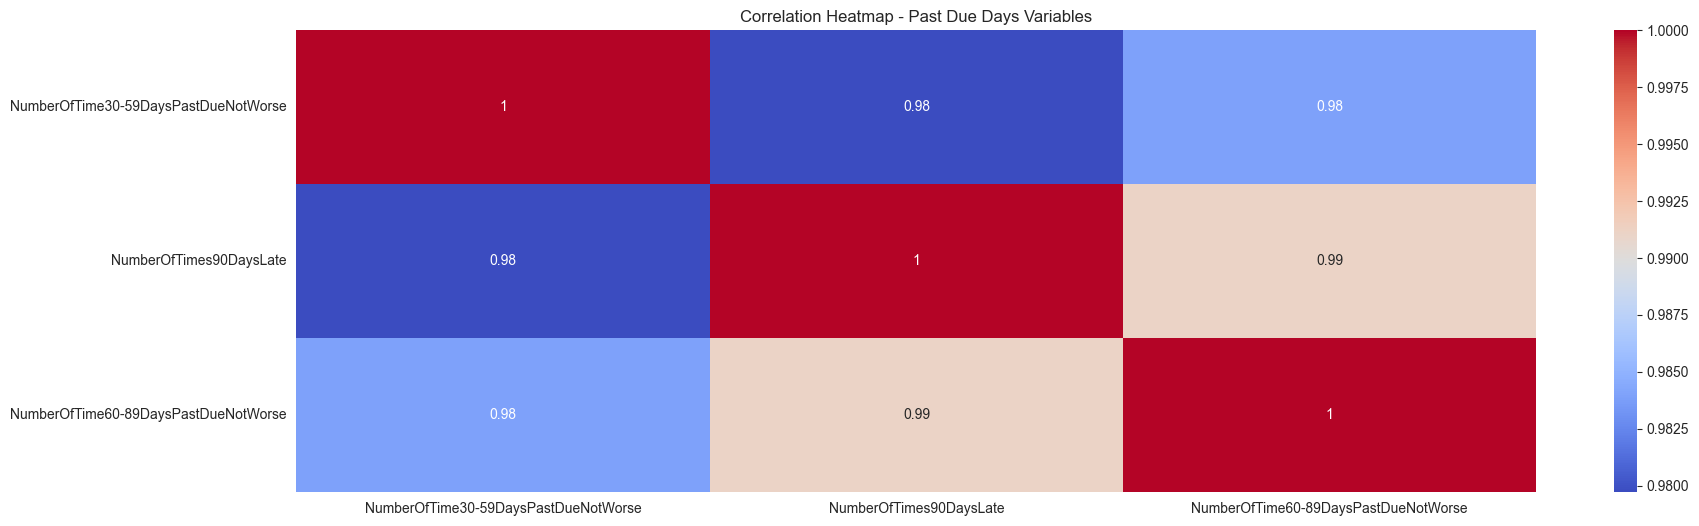

In [476]:
# Select the relevant columns for correlation analysis
corr_variables = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']
correlation_subset = training_data[corr_variables]

# Compute the correlation matrix
corr_matrix = correlation_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Past Due Days Variables')
plt.show()


In [479]:
corr_matrix

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
NumberOfTime30-59DaysPastDueNotWorse,1.000000,0.979702,0.983910
NumberOfTimes90DaysLate,0.979702,1.000000,0.991059
NumberOfTime60-89DaysPastDueNotWorse,0.983910,0.991059,1.000000


#### Heatmap

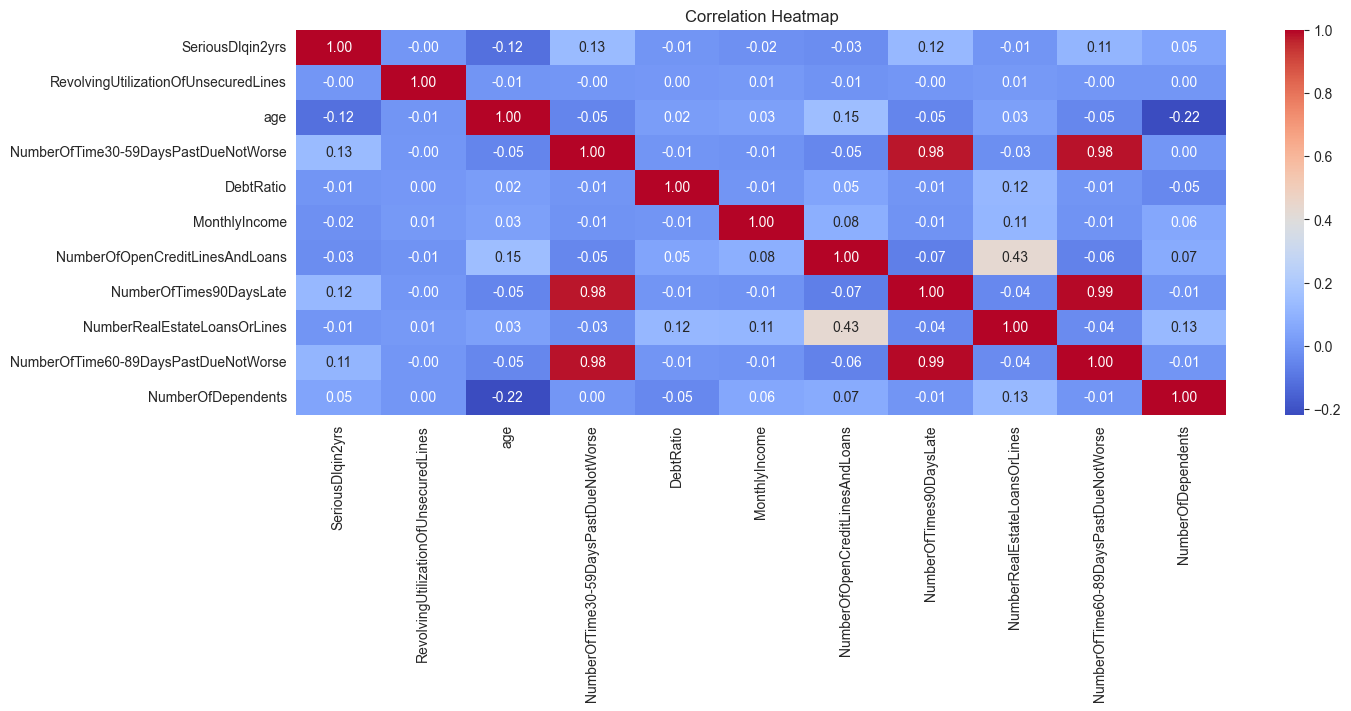

In [443]:
plt.figure(figsize=(15, 5))  # Size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### Age distribution by Serious Delinquency in 2 years

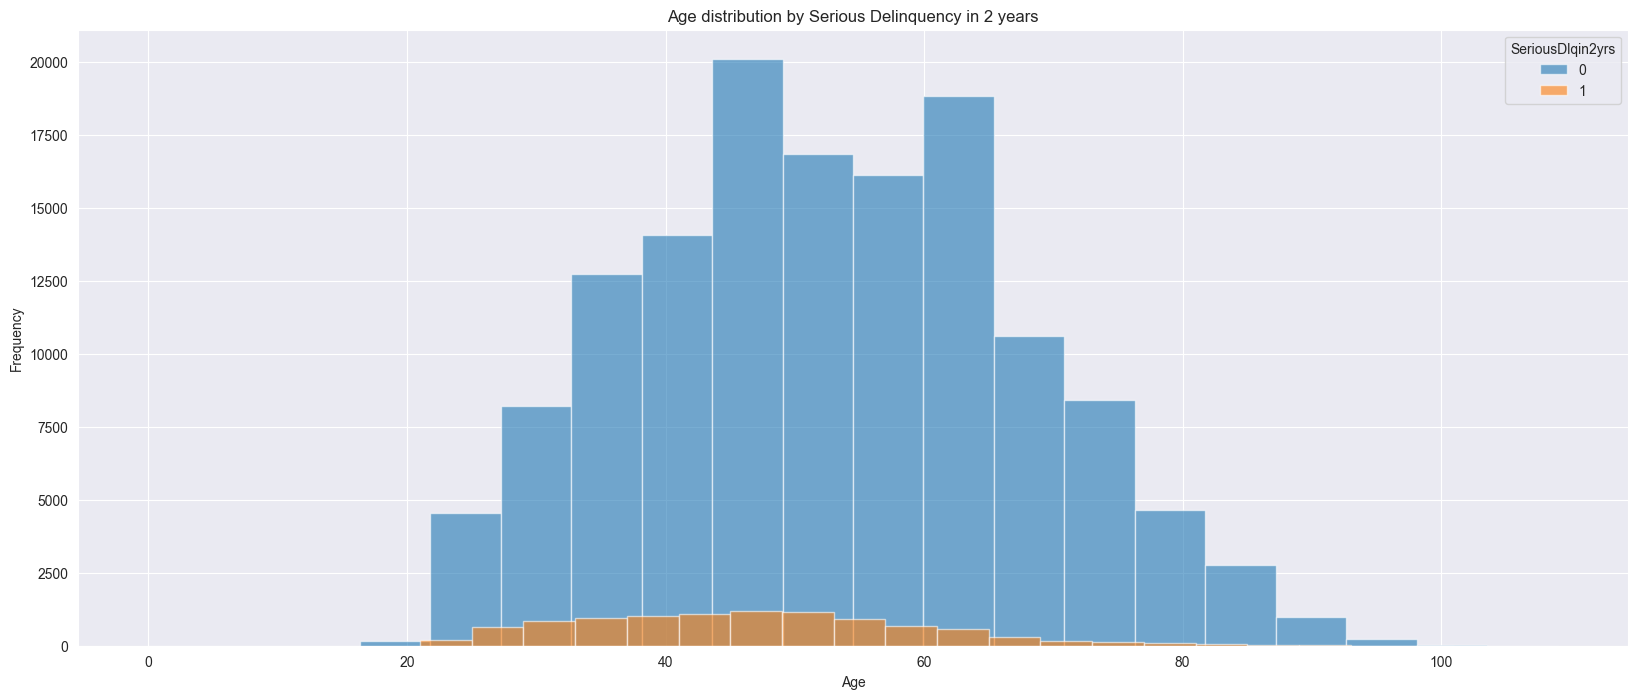

In [444]:
fig, ax = plt.subplots(figsize=(20,8))

for label, group in training_data.groupby('SeriousDlqin2yrs'):
    group['age'].hist(alpha=0.6, ax=ax, label=label, bins=20)

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age distribution by Serious Delinquency in 2 years')
plt.legend(title='SeriousDlqin2yrs')
plt.show()

#### Monthly Income by Serious Delinquency in 2 years

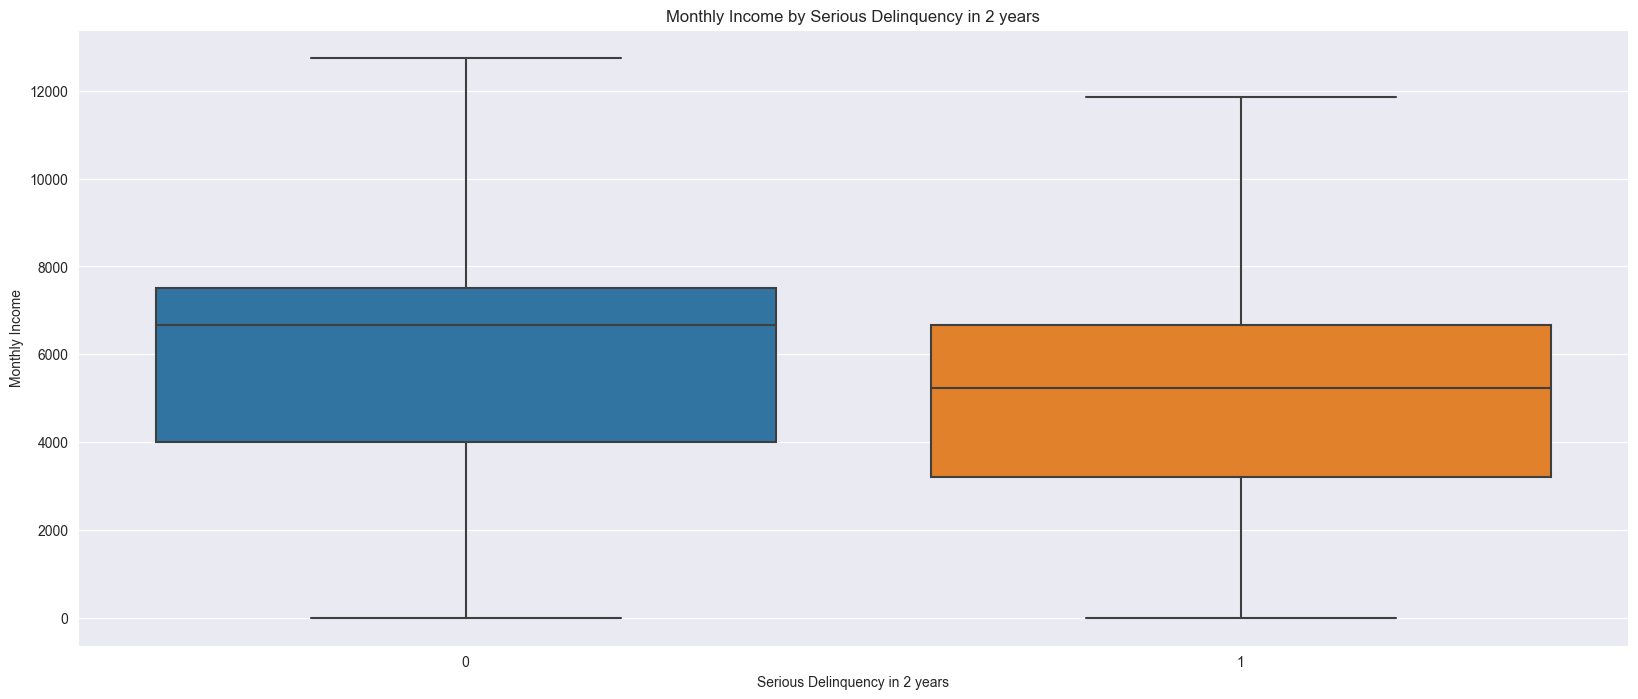

In [445]:
# Create a Grouped  boxplot
plt.figure(figsize=(20,8))
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=training_data, showfliers=False)

plt.xlabel('Serious Delinquency in 2 years')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Serious Delinquency in 2 years')
plt.show()

In [483]:
import pandas as pd

# Group the data by 'SeriousDlqin2yrs' and calculate the statistics
grouped_stats = training_data.groupby('SeriousDlqin2yrs')['MonthlyIncome'].describe()

# Create a table DataFrame with the statistics
table_data = pd.DataFrame({
    'Group': grouped_stats.index,
    'Count': grouped_stats['count'].astype(int),
    'Mean': grouped_stats['mean'].round(2),
    'Median': grouped_stats['50%'].astype(int),
    'Min': grouped_stats['min'].astype(int),
    'Max': grouped_stats['max'].astype(int),
})

# Set the 'Group' column as the index
table_data.set_index('Group', inplace=True)

# Display the table
print(table_data)


        Count     Mean  Median  Min      Max
Group                                       
0      139229  6736.73    6666    0  3008750
1       10004  5803.18    5222    0   250000


In [389]:
correlation = training_data['MonthlyIncome'].corr(training_data['DebtRatio'])
print("Correlation between Monthly Income and Debt Ratio: {:.2f}".format(correlation))


Correlation between Monthly Income and Debt Ratio: -0.01


#### Debt Ratio Comparison - SeriousDlqin2yrs

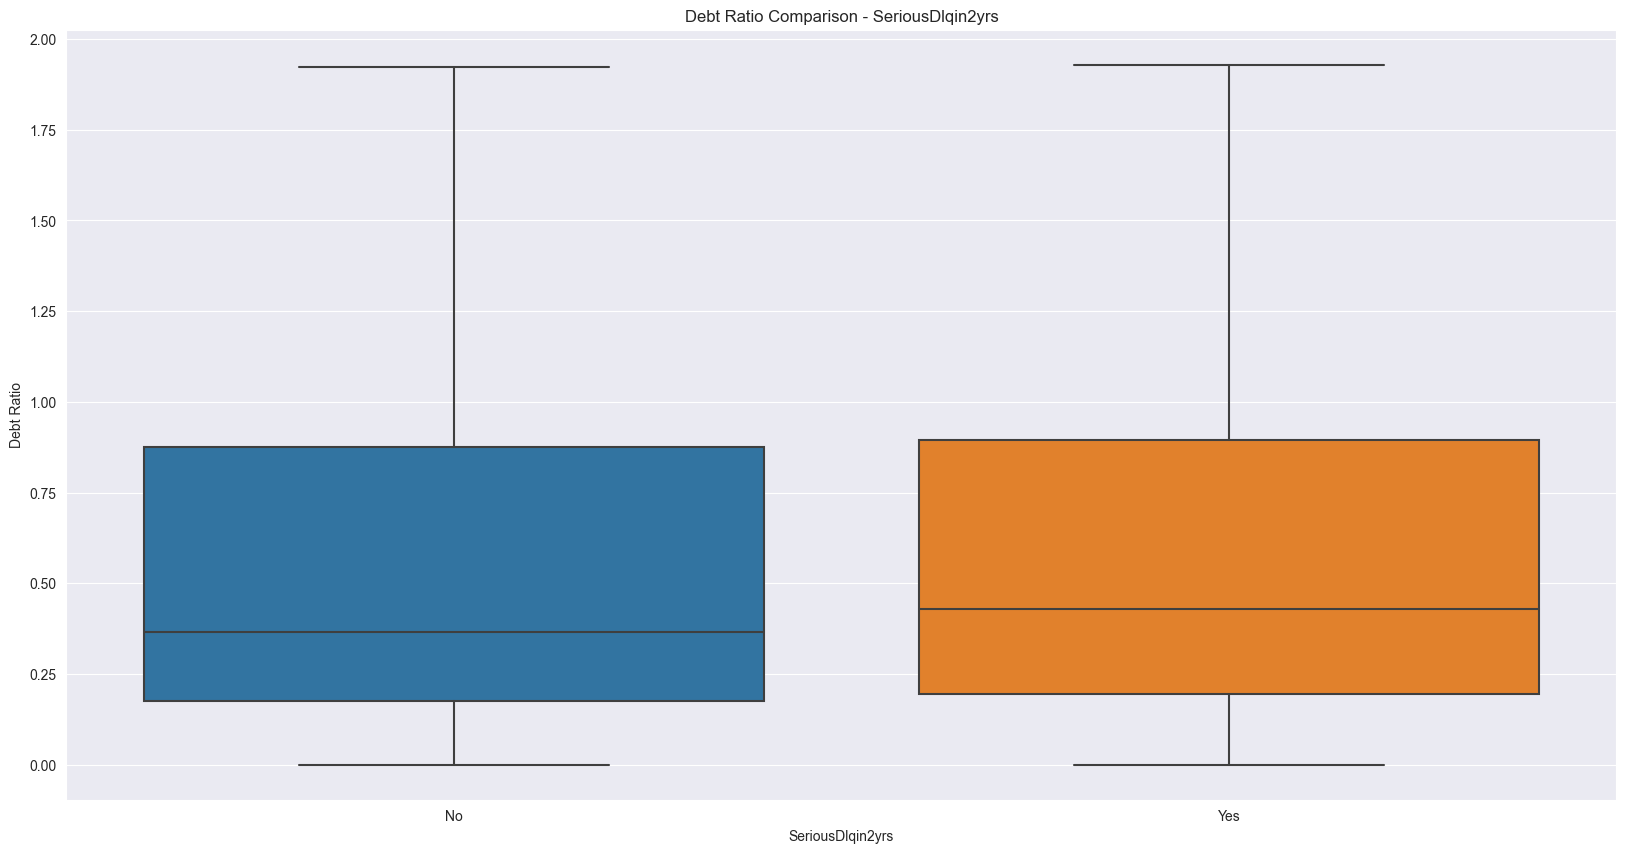

In [446]:
plt.figure(figsize=(20, 10))  # Size of the figure
sns.boxplot(x=training_data['SeriousDlqin2yrs'], y=training_data['DebtRatio'], showfliers=False)
plt.title('Debt Ratio Comparison - SeriousDlqin2yrs')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Debt Ratio')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


#### Revolving Utilization Of Unsecured Lines by Serious Delinquency in 2 years

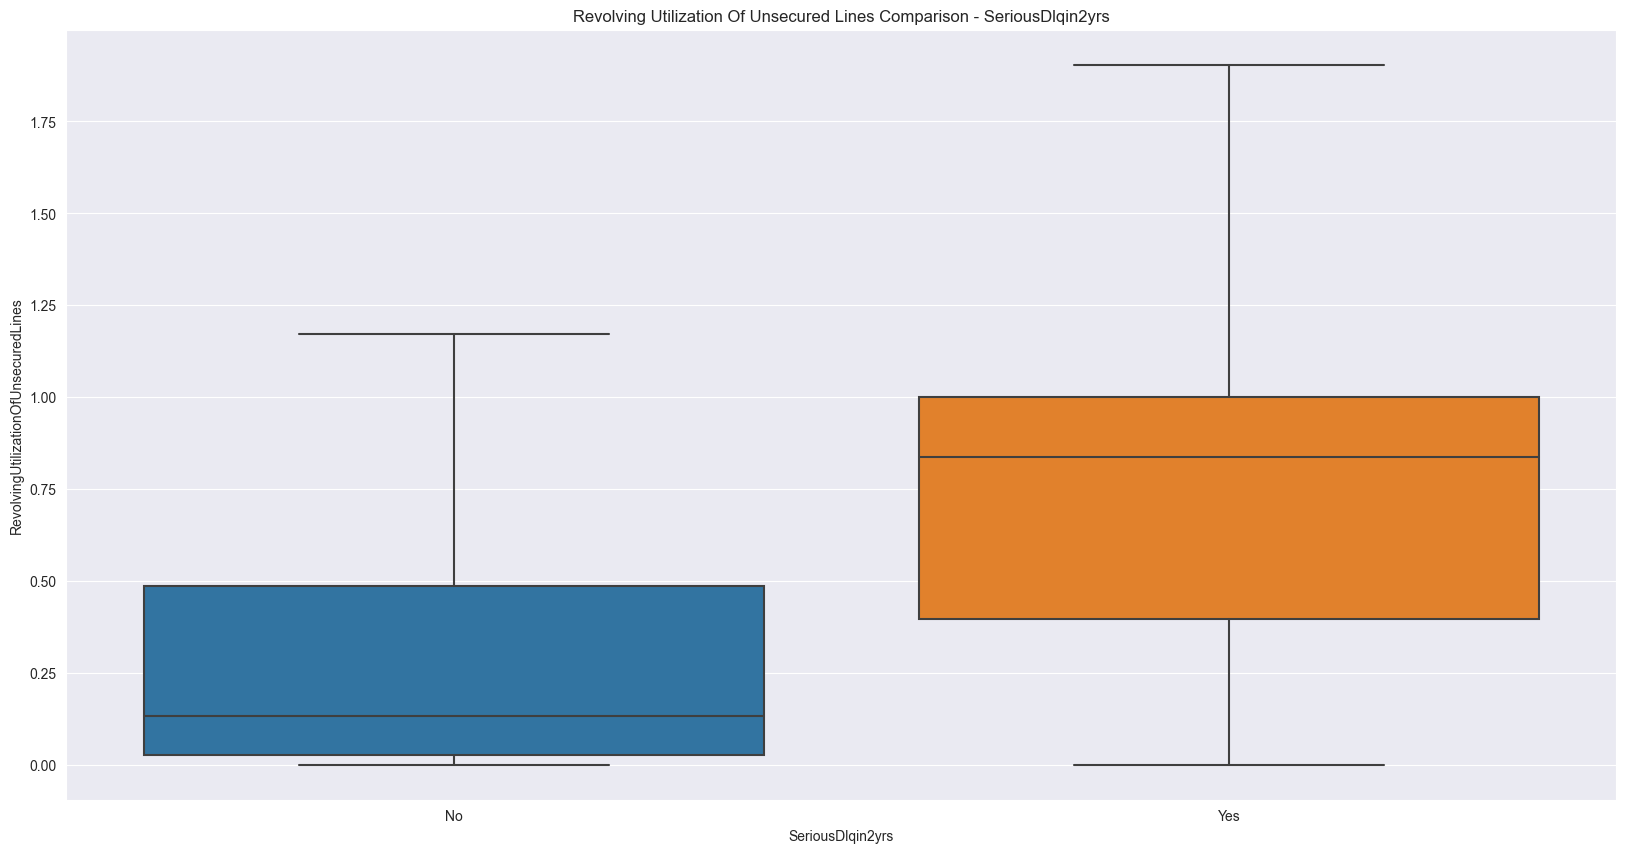

In [472]:
plt.figure(figsize=(20, 10))  # Size of the figure
sns.boxplot(x=training_data['SeriousDlqin2yrs'], y=training_data['RevolvingUtilizationOfUnsecuredLines'], showfliers=False)
plt.title('Revolving Utilization Of Unsecured Lines Comparison - SeriousDlqin2yrs')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('RevolvingUtilizationOfUnsecuredLines')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [482]:

# Create a DataFrame with the box plot data
boxplot_data = pd.DataFrame({
    'SeriousDlqin2yrs': ['No', 'Yes'],
    'Median Revolving Utilization': [
        training_data.loc[training_data['SeriousDlqin2yrs'] == 0, 'RevolvingUtilizationOfUnsecuredLines'].median(),
        training_data.loc[training_data['SeriousDlqin2yrs'] == 1, 'RevolvingUtilizationOfUnsecuredLines'].median()
    ],
    '1st Quartile Revolving Utilization': [
        training_data.loc[training_data['SeriousDlqin2yrs'] == 0, 'RevolvingUtilizationOfUnsecuredLines'].quantile(0.25),
        training_data.loc[training_data['SeriousDlqin2yrs'] == 1, 'RevolvingUtilizationOfUnsecuredLines'].quantile(0.25)
    ],
    '3rd Quartile Revolving Utilization': [
        training_data.loc[training_data['SeriousDlqin2yrs'] == 0, 'RevolvingUtilizationOfUnsecuredLines'].quantile(0.75),
        training_data.loc[training_data['SeriousDlqin2yrs'] == 1, 'RevolvingUtilizationOfUnsecuredLines'].quantile(0.75)
    ]
})

# Set the 'SeriousDlqin2yrs' column as the index
boxplot_data.set_index('SeriousDlqin2yrs', inplace=True)

# Display the table

boxplot_data

,Median Revolving Utilization,1st Quartile Revolving Utilization,3rd Quartile Revolving Utilization
SeriousDlqin2yrs,,,
No,0.133433,0.027324,0.484955
Yes,0.837421,0.396984,1.000000


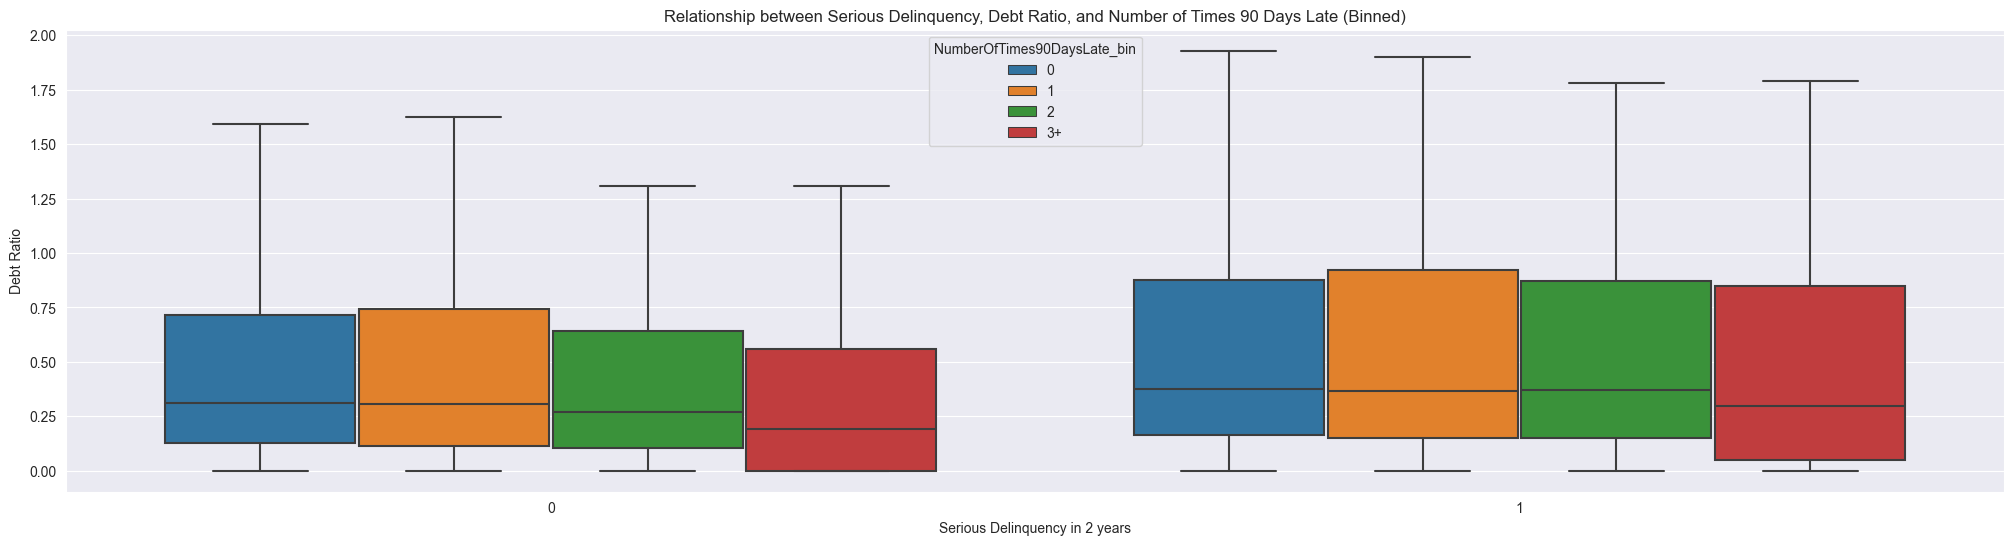

In [466]:
# Bin the NumberOfTimes90DaysLate variable
bins = [0, 1, 2, 3, float('inf')]
labels = ['0', '1', '2', '3+']
training_data['NumberOfTimes90DaysLate_bin'] = pd.cut(training_data['NumberOfTimes90DaysLate'], bins=bins, labels=labels)

# Create a grouped box plot
plt.figure(figsize=(25, 6))
sns.boxplot(x='SeriousDlqin2yrs', y='DebtRatio', hue='NumberOfTimes90DaysLate_bin', data=training_data, showfliers=False)
plt.xlabel('Serious Delinquency in 2 years')
plt.ylabel('Debt Ratio')
plt.title('Relationship between Serious Delinquency, Debt Ratio, and Number of Times 90 Days Late (Binned)')
plt.show()


## Data Manipulation

In [391]:
# Create a copy of the training data to perform data manipulation
training_data_copy = training_data.copy()

### Age Manipulation

In [392]:
print(training_data_copy.age.value_counts())

age
49     3833
48     3799
50     3746
47     3718
46     3709
       ... 
102       3
109       2
107       1
105       1
0         1
Name: count, Length: 86, dtype: int64


In [393]:
# print the count of records less than 18 and the count of records greater than 65
print("Number of records less than 18 years old: {}".format(training_data_copy[training_data_copy['age'] < 18]['age'].count()))
print("Number of records greater than 65 years old: {}".format(training_data_copy[training_data_copy['age'] > 70]['age'].count()))
# the percentage of records > 65 years old
print("Percentage of records greater than 65 years old: {:.2f}%".format(training_data_copy[training_data_copy['age'] > 70]['age'].count() / training_data_copy['age'].count() * 100))

Number of records less than 18 years old: 1
Number of records greater than 65 years old: 17424
Percentage of records greater than 65 years old: 11.68%


In [394]:
# drop the records less than 18
training_data_copy.drop(training_data_copy[training_data_copy['age'] < 18].index, inplace=True)

#### Age Binning

In [395]:
bins = [18, 30, 50, 70, float('inf')]
labels = ['18-29', '30-49', '50-69', '70 and above']

training_data_copy['age_bin'] = pd.cut(training_data_copy['age'], bins=bins, labels=labels)

age_bin_mapping = {'18-29': 1, '30-49': 2, '50-69': 3, '70 and above': 4}

training_data_copy['age_bin_encoded'] = training_data_copy['age_bin'].map(age_bin_mapping)

In [396]:
training_data_copy.age_bin_encoded.dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)

## Handle Outliers and Extreme Values

In [397]:
def remove_top_percentile(df, columns, percentile=99):
    """
    Function to remove the top percentile of values in specified columns.

    Parameters:
    df (pandas.DataFrame): the data
    columns (list): the columns from which to remove values
    percentile (float): the percentile above which to remove values

    Returns:
    df (pandas.DataFrame): the data with extreme values removed
    """
    for col in columns:
        threshold = np.percentile(df[col], percentile)
        df = df[df[col] <= threshold]
    return df

# Define the columns
columns = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']

# Remove the top 0.5 percentile values
training_data_copy = remove_top_percentile(training_data_copy, columns)


In [398]:
def cap_extreme_values(df, cols_to_cap, threshold):
    """
    Cap extreme values in a DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    cols_to_cap (list): Columns in which to cap values.
    threshold (int): Values higher than this will be capped.

    Returns:
    df (pd.DataFrame): DataFrame with extreme values capped.
    """
    for col in cols_to_cap:
        df.loc[df[col] > threshold, col] = threshold

    return df


# List of columns to cap
cols_to_cap = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']

# Cap values in dataframe
training_data_copy = cap_extreme_values(training_data_copy, cols_to_cap, 20)


## Data Tranformation

### Box-Cox Transformation of (highly) skewed features

In [399]:
from scipy import stats

def boxcox_transform_skewed_columns(df):
    # Identify the highly skewed columns
    skewed_df = analyze_skewness(df)
    highly_skewed_columns = skewed_df[skewed_df['Highly Skewed'] == 'Yes']['Variables'].tolist()

    # Apply Box-Cox transformation to the highly skewed columns
    for column in highly_skewed_columns:
        if df[column].min() > 0 and df[column].notnull().all():  # Box-Cox transformation requires strictly positive values
            df[column], _ = stats.boxcox(df[column])

    return df

# Apply the function to the dataframe
training_data_copy = boxcox_transform_skewed_columns(training_data_copy)


In [400]:
training_data_copy['SeriousDlqin2yrs'].value_counts()


SeriousDlqin2yrs
0    135568
1      9232
Name: count, dtype: int64

# Feature Importance

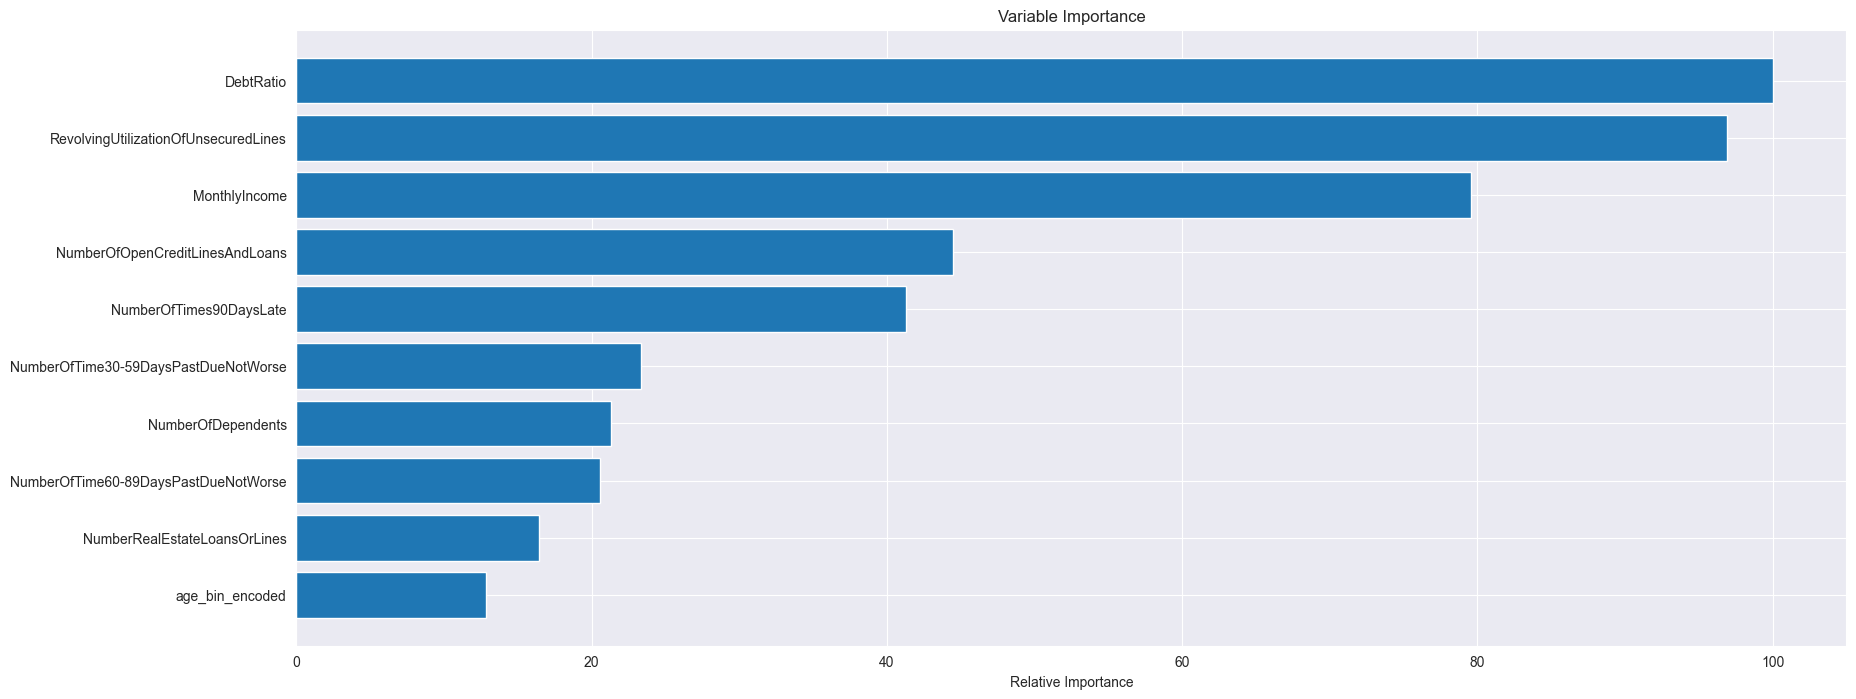

In [450]:

clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
X_ = training_data_copy.drop(['SeriousDlqin2yrs', 'age_bin', 'age'], axis=1)
y_ = training_data_copy['SeriousDlqin2yrs']
clf.fit(X_, y_)

# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Sort features and create a range
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Plot feature importance
plt.figure(figsize=(20,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Feature Selection

In [402]:
# SelectFromModel will select those features which importance is greater than the mean importance of all the features by default
selector = SelectFromModel(clf)
selector.fit(X_, y_)

# Transform the train and test features
X_train_sfm = selector.transform(X_)

# Get the selected feature indices
selected_feat_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feat_names = X_.columns[selected_feat_indices]

print("Selected features: ", selected_feat_names)



Selected features:  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'], dtype='object')


# Feature Scaling

In [403]:
features = ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']



# Defining features and target variable
X = training_data_copy[features]
y = training_data_copy['SeriousDlqin2yrs']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 101360 samples.
Testing set has 43440 samples.


In [404]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

## Random Forest Classifier Model with Hyperparameter Tuning

In [405]:
rclf = RandomForestClassifier()

# Define the grid of hyperparameters
params = {'n_estimators': [50, 100, 150],
          'max_depth': [3,None],
          'min_samples_leaf': [1, 2, 3, 10],
          'min_samples_split': [2, 3, 10],
          }

rclf_grid = RandomizedSearchCV(rclf, params, cv=5, scoring='roc_auc', n_iter =10,)
rclf_grid.fit(X_train, y_train)

print("Best parameters: {}".format(rclf_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(rclf_grid.best_score_))

Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': None}
Best cross-validation score: 0.85


In [406]:
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, rclf_grid.predict_proba(X_test)[:, 1])))


Test set AUC: 0.851


In [407]:
print("Test set accuracy: {:.2f}".format(rclf_grid.score(X_test, y_test)))

Test set accuracy: 0.85


## Model Evaluation

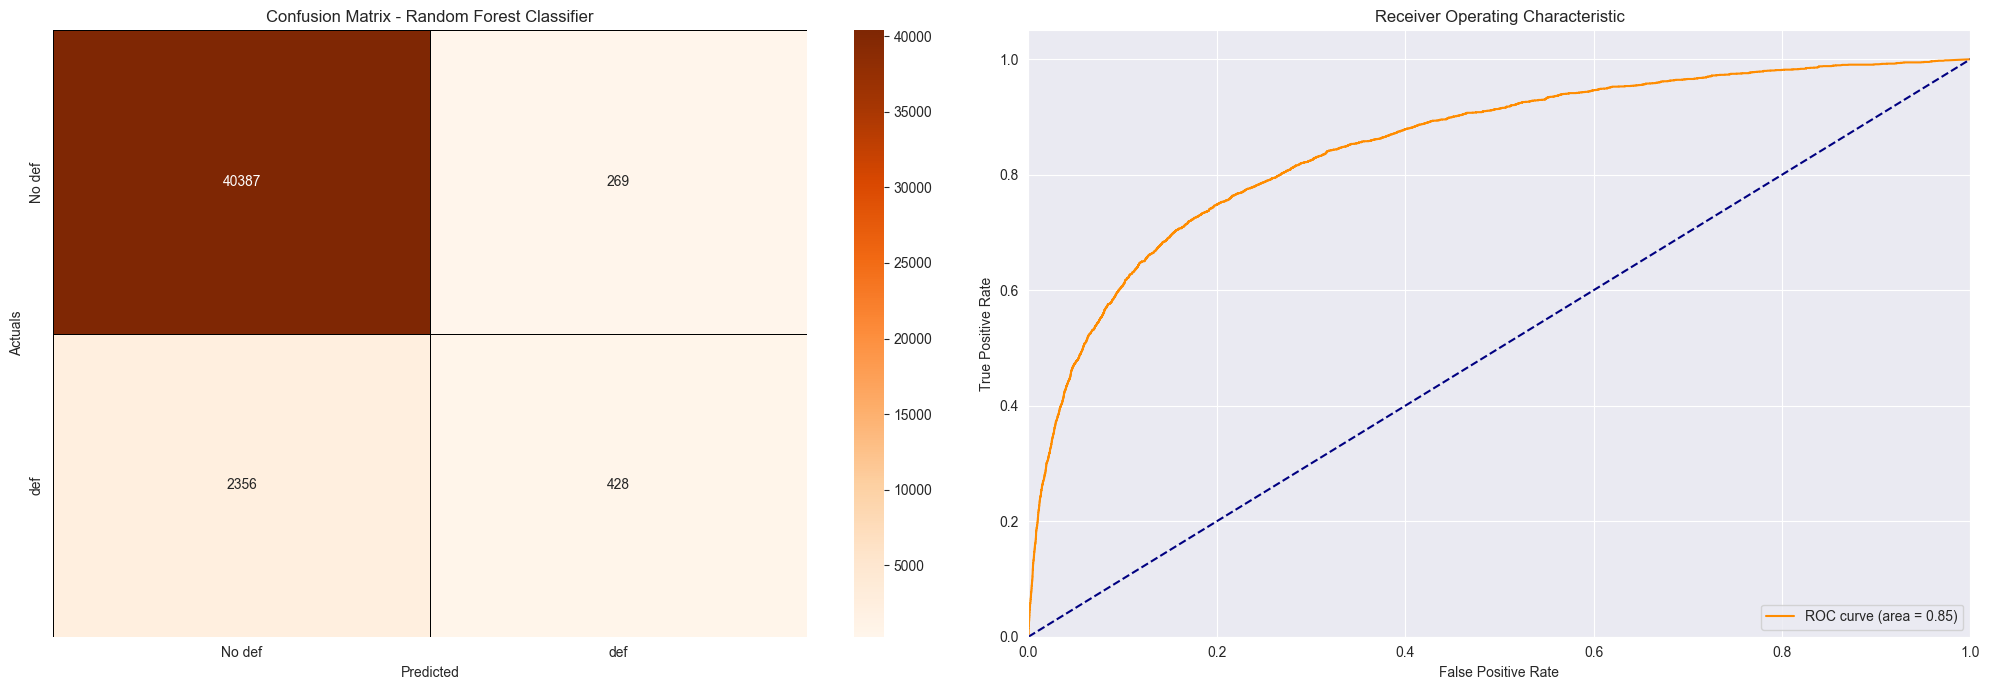

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     40656
           1       0.61      0.15      0.25      2784

    accuracy                           0.94     43440
   macro avg       0.78      0.57      0.61     43440
weighted avg       0.92      0.94      0.92     43440



In [408]:
# Run prediction on the test set
y_pred = rclf_grid.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rclf_grid.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Classification Report
cr = classification_report(y_test, y_pred)

# Create a grid for subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', linewidths=0.5, linecolor='Black', ax=ax[0])
ax[0].set_xticks(np.arange(2)+0.5)
ax[0].set_xticklabels(['0', '1'])
ax[0].set_yticks(np.arange(2)+0.5)
ax[0].set_yticklabels(['0', '1'])
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actuals")
ax[0].set_title("Confusion Matrix - Random Forest Classifier")

# Plot ROC Curve
ax[1].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic')
ax[1].legend(loc="lower right")

# Show the plots
plt.tight_layout()
plt.show()

# Print Classification Report
print("Classification Report:\n", cr)


## Gradient Boosting Classifier Model with Hyperparameter Tuning

In [409]:

gclf = GradientBoostingClassifier(random_state=40,max_features=3,max_depth=5,learning_rate=0.25)
# use a full grid over all parameters
gclf_param_grid = {"n_estimators" : [20,30,40],
              "max_depth": [2,5,7,9],
              "max_features": [2,3,5],
              'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
             }
# run grid search
gclf_param_grid = RandomizedSearchCV(gclf, gclf_param_grid, cv=5, scoring='roc_auc', n_iter=10)
gclf_param_grid.fit(X_train, y_train)

print("Grid-Search with roc_auc")
print("Best parameters:", gclf_param_grid.best_params_)
print("Best cross-validation score (auc_roc)): {:.3f}".format(gclf_param_grid.best_score_))



Grid-Search with roc_auc
Best parameters: {'n_estimators': 20, 'max_features': 3, 'max_depth': 7, 'learning_rate': 0.05}
Best cross-validation score (auc_roc)): 0.855


In [410]:
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, gclf_param_grid.predict_proba(X_test)[:, 1])))
print("Test set accuracy: {:.3f}".format(gclf_param_grid.score(X_test, y_test)))

Test set AUC: 0.855
Test set accuracy: 0.855


## Model Evaluation

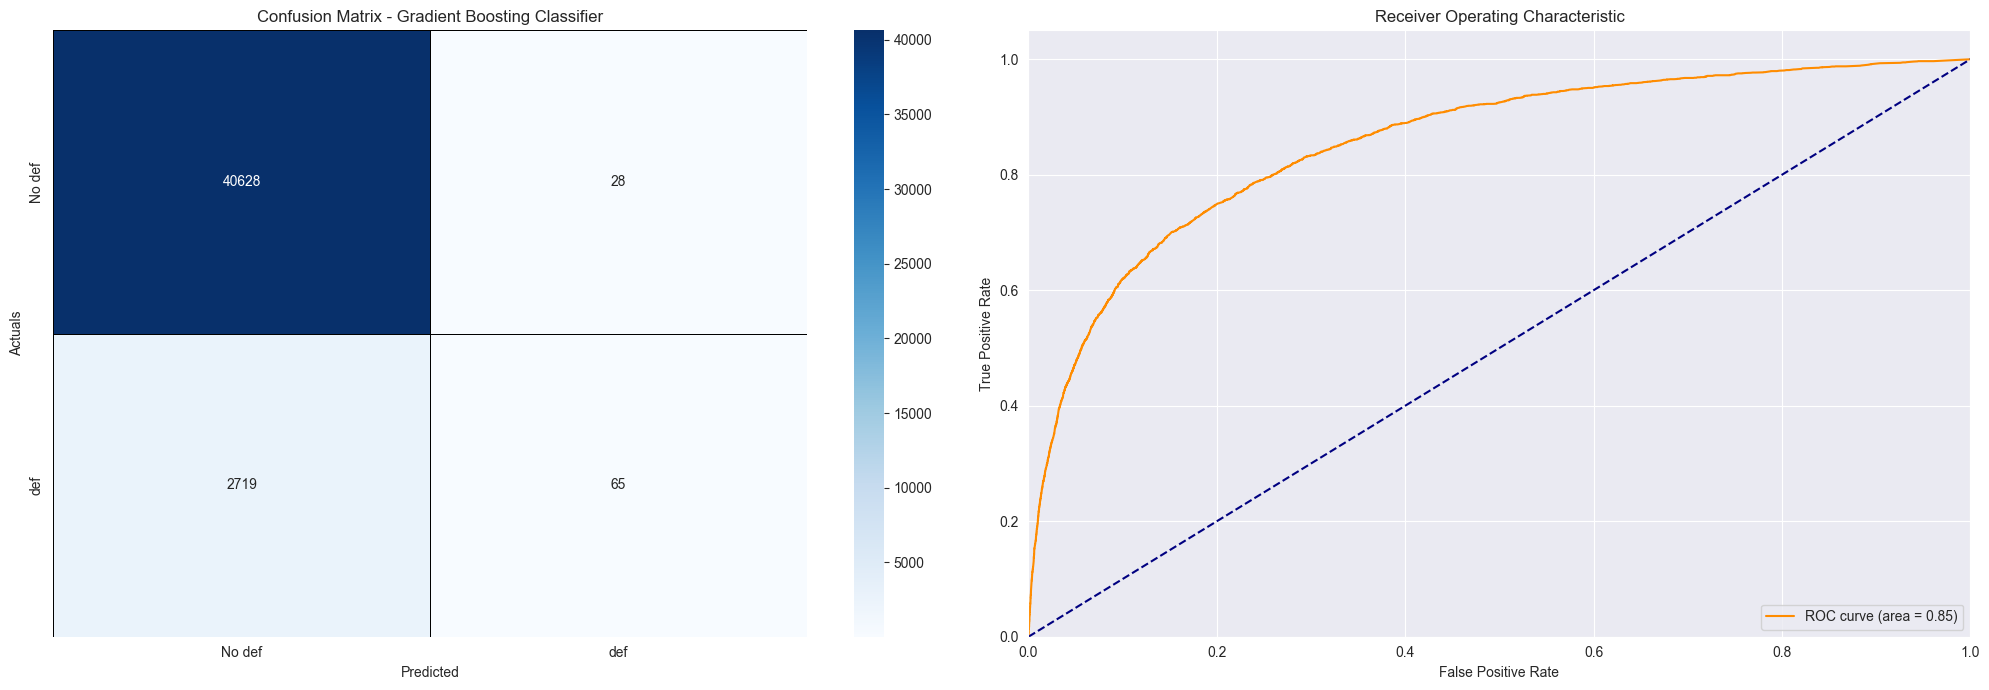

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     40656
           1       0.70      0.02      0.05      2784

    accuracy                           0.94     43440
   macro avg       0.82      0.51      0.51     43440
weighted avg       0.92      0.94      0.91     43440



In [411]:

# Run prediction on the test set
y_pred = gclf_param_grid.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, gclf_param_grid.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Classification Report
cr = classification_report(y_test, y_pred)

# Create a grid for subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='Black', ax=ax[0])
ax[0].set_xticks(np.arange(2)+0.5)
ax[0].set_xticklabels(['0', '1'])
ax[0].set_yticks(np.arange(2)+0.5)
ax[0].set_yticklabels(['0', '1'])
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actuals")
ax[0].set_title("Confusion Matrix - Gradient Boosting Classifier")

# Plot ROC Curve
ax[1].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic')
ax[1].legend(loc="lower right")

# Show the plots
plt.tight_layout()
plt.show()

# Print Classification Report
print("Classification Report:\n", cr)


## XGBoost Classifier Model with Hyperparameter Tuning

In [451]:

from sklearn.model_selection import StratifiedKFold

xgclf = XGBClassifier(random_state=40,  eval_metric='logloss')
# use a full grid over all parameters
xgclf_param_grid =  {
            'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
            'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
        }
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# run grid search
xgclf_param_grid = RandomizedSearchCV(xgclf,
                                         xgclf_param_grid,
                                         cv=stratified_kfold,
                                         scoring='roc_auc',
                                         n_iter=10)
xgclf_param_grid.fit(X_train, y_train)

print("Grid-Search with roc_auc")
print("Best parameters:", xgclf_param_grid.best_params_)
print("Best cross-validation score (auc_roc)): {:.3f}".format(xgclf_param_grid.best_score_))



Grid-Search with roc_auc
Best parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
Best cross-validation score (auc_roc)): 0.856


In [452]:
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, xgclf_param_grid.predict_proba(X_test)[:, 1])))
print("Test set accuracy: {:.3f}".format(xgclf_param_grid.score(X_test, y_test)))

Test set AUC: 0.859
Test set accuracy: 0.859


## Model Evaluation

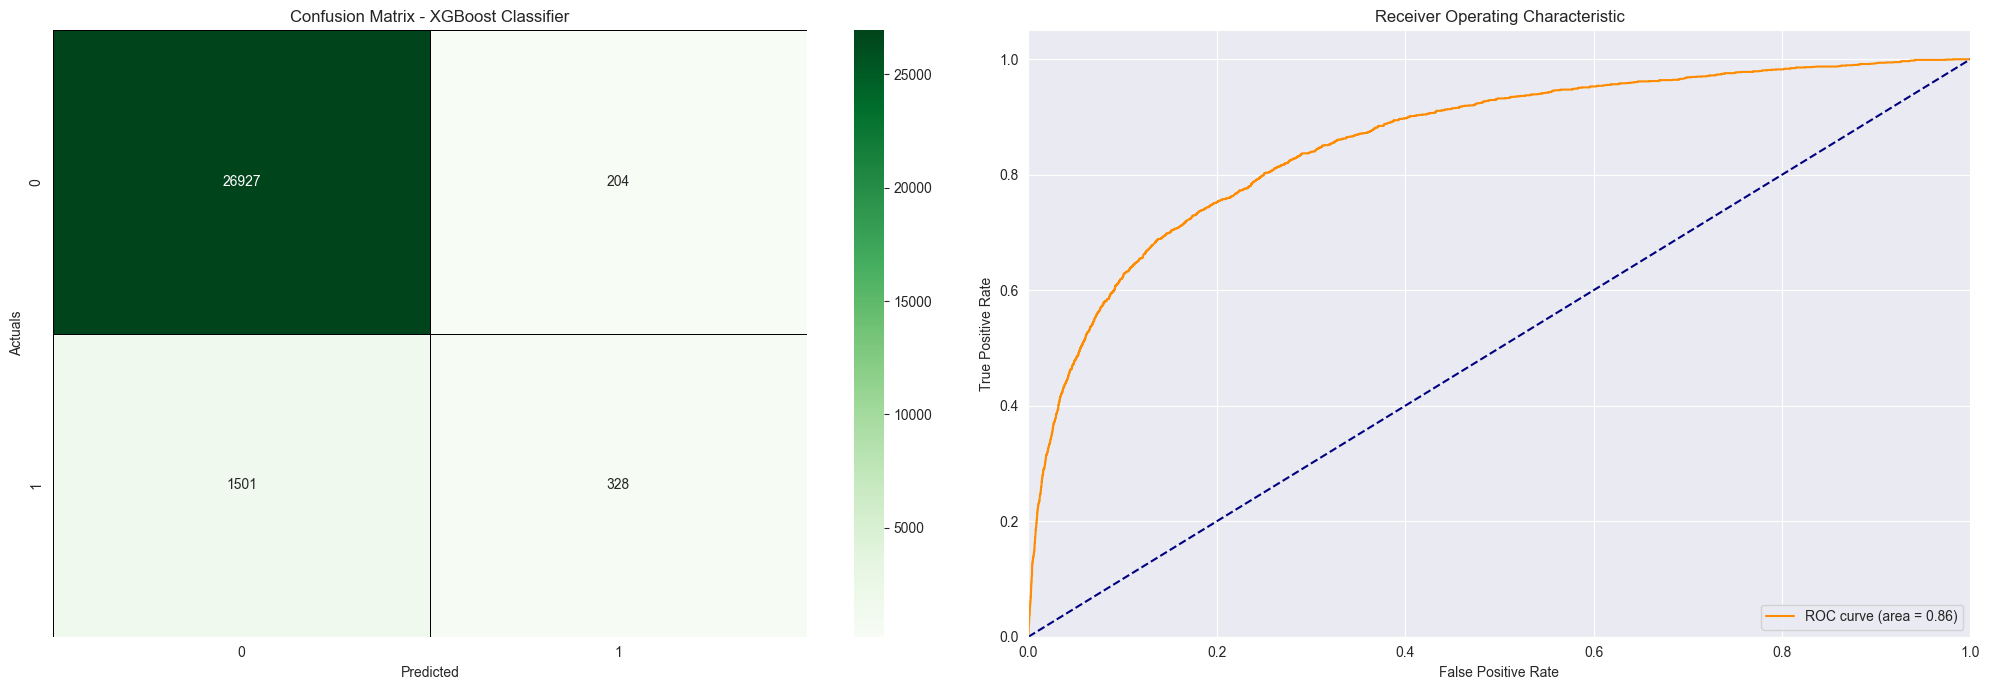

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     27131
           1       0.62      0.18      0.28      1829

    accuracy                           0.94     28960
   macro avg       0.78      0.59      0.62     28960
weighted avg       0.93      0.94      0.93     28960



In [453]:

# Run prediction on the test set
y_pred = xgclf_param_grid.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgclf_param_grid.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Classification Report
cr = classification_report(y_test, y_pred)

# Create a grid for subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', linewidths=0.5, linecolor='Black', ax=ax[0])
ax[0].set_xticks(np.arange(2)+0.5)
ax[0].set_xticklabels(['0', '1'])
ax[0].set_yticks(np.arange(2)+0.5)
ax[0].set_yticklabels(['0', '1'])
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actuals")
ax[0].set_title("Confusion Matrix - XGBoost Classifier")

# Plot ROC Curve
ax[1].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic')
ax[1].legend(loc="lower right")

# Show the plots
plt.tight_layout()
plt.show()

# Print Classification Report
print("Classification Report:\n", cr)


## XGBoost DMartix Model

In [426]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

dmatrics_params ={
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'eta':0.1,
    'max_depth':4,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'seed':42
}

# train the model
num_rounds = 100
xgb_model = xgb.train(dmatrics_params, dtrain, num_rounds)

# make prediction on test set
preds = xgb_model.predict(dtest)
predictions = [round(value) for value in preds]

#
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 94.13%


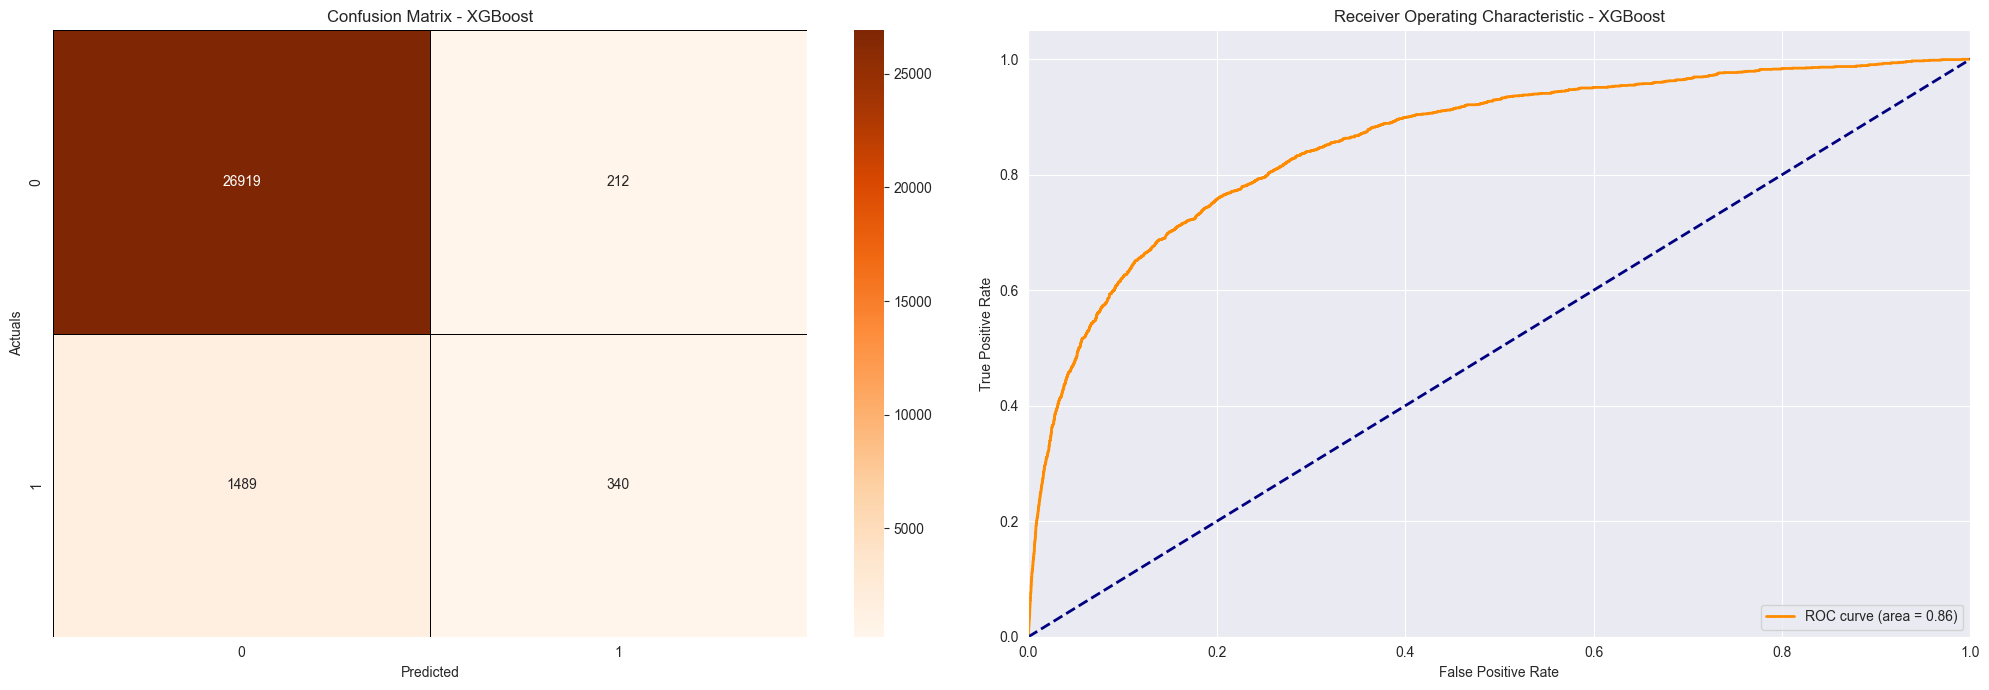

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27131
           1       0.62      0.19      0.29      1829

    accuracy                           0.94     28960
   macro avg       0.78      0.59      0.63     28960
weighted avg       0.93      0.94      0.93     28960



In [434]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Confusion Matrix Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', linewidths=0.5, linecolor='Black', ax=axs[0])
axs[0].set_xticks([0.5, 1.5])
axs[0].set_yticks([0.5, 1.5])
axs[0].set_xticklabels(['0', '1'])
axs[0].set_yticklabels(['0', '1'])
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actuals")
axs[0].set_title("Confusion Matrix - XGBoost")

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

axs[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic - XGBoost')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Classification Report
print(classification_report(y_test, predictions))


In [433]:
dtest_inputs = xgb.DMatrix(X_test)
probs = xgb_model.predict(dtest_inputs)
probs

array([0.11454861, 0.01748629, 0.00761961, ..., 0.5375522 , 0.03328554,
       0.02370997], dtype=float32)